#Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingGridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score


from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, kruskal
import statsmodels.api as sm

In [3]:
df=pd.read_csv('Scraped_dataset.csv')
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


In [4]:
df.tail()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
452083,15/01/2023,06/03/2023,Vistara \nUK-926\nBUSINESS,06:45\nAhmedabad,19:50\nChennai,13h 05m,1-stop,"65,028"
452084,15/01/2023,06/03/2023,Vistara \nUK-918\nBUSINESS,05:05\nAhmedabad,16:20\nChennai,11h 15m,1-stop,"69,254"
452085,15/01/2023,06/03/2023,Vistara \nUK-918\nBUSINESS,05:05\nAhmedabad,16:20\nChennai,11h 15m,1-stop,"69,254"
452086,15/01/2023,06/03/2023,Vistara \nUK-946\nBUSINESS,08:40\nAhmedabad,19:50\nChennai,11h 10m,1-stop,"72,980"
452087,15/01/2023,06/03/2023,Vistara \nUK-946\nBUSINESS,08:40\nAhmedabad,19:50\nChennai,11h 10m,1-stop,"72,980"


In [5]:
df.shape

(452088, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date of Booking  452088 non-null  object
 1   Date of Journey  452088 non-null  object
 2   Airline-Class    452088 non-null  object
 3   Departure Time   452088 non-null  object
 4   Arrival Time     452088 non-null  object
 5   Duration         452088 non-null  object
 6   Total Stops      452088 non-null  object
 7   Price            452088 non-null  object
dtypes: object(8)
memory usage: 27.6+ MB


In [7]:
df.duplicated().sum()

6722

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(445366, 8)

In [9]:
df.isna().sum()

,0
Date of Booking,0
Date of Journey,0
Airline-Class,0
Departure Time,0
Arrival Time,0
Duration,0
Total Stops,0
Price,0


#Data Cleaning

####Days

In [10]:
df['Date of Booking']=pd.to_datetime(df['Date of Booking'],format='%d/%m/%Y')
df['Date of Journey']=pd.to_datetime(df['Date of Journey'],format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445366 entries, 0 to 452086
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date of Booking  445366 non-null  datetime64[ns]
 1   Date of Journey  445366 non-null  datetime64[ns]
 2   Airline-Class    445366 non-null  object        
 3   Departure Time   445366 non-null  object        
 4   Arrival Time     445366 non-null  object        
 5   Duration         445366 non-null  object        
 6   Total Stops      445366 non-null  object        
 7   Price            445366 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 30.6+ MB


In [11]:
df['Date of Booking'].dt.year.unique(),df['Date of Booking'].dt.month.unique(),df['Date of Booking'].dt.day.unique()

(array([2023], dtype=int32), array([1], dtype=int32), array([15], dtype=int32))

In [12]:
df['Date of Booking'].unique()

<DatetimeArray>
['2023-01-15 00:00:00']
Length: 1, dtype: datetime64[ns]

In [13]:
df['dotw']=df['Date of Journey'].dt.day_name()
df.sample(10)

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,dotw
199387,2023-01-15,2023-01-22,Vistara \nUK-810\nBUSINESS,07:00\nBangalore,19:50\nHyderabad,12h 50m,1-stop,"71,198",Sunday
305231,2023-01-15,2023-01-20,Vistara \nUK-778\nECONOMY,15:20\nKolkata,21:15\nMumbai,05h 55m,1-stop,"21,207",Friday
141820,2023-01-15,2023-01-20,Indigo \n6E-5258\nECONOMY,20:30\nMumbai,01:05\nChennai,04h 35m,1-stop,"9,482",Friday
82271,2023-01-15,2023-03-02,Indigo \n6E- 789\nECONOMY,21:30\nDelhi,07:25\nAhmedabad,09h 55m,1-stop,"7,874",Thursday
15831,2023-01-15,2023-02-26,Vistara \nUK-871\nPREMIUMECONOMY,20:40\nDelhi,08:15\nMumbai,11h 35m,1-stop,"12,262",Sunday
392465,2023-01-15,2023-01-25,Air India \nAI-553\nBUSINESS,07:50\nChennai,14:30\nKolkata,06h 40m,1-stop,"55,537",Wednesday
96155,2023-01-15,2023-02-25,Vistara \nUK-952\nBUSINESS,12:25\nMumbai,14:50\nDelhi,02h 25m,non-stop,"41,516",Saturday
415174,2023-01-15,2023-03-06,Vistara \nUK-918\nBUSINESS,05:05\nAhmedabad,09:40\nDelhi,04h 35m,1-stop,"41,780",Monday
149672,2023-01-15,2023-02-20,Indigo \n6E- 461\nECONOMY,05:25\nMumbai,11:35\nChennai,06h 10m,1-stop,"7,991",Monday
102360,2023-01-15,2023-01-24,Vistara \nUK-950\nBUSINESS,21:55\nMumbai,18:50\nBangalore,20h 55m,1-stop,"76,941",Tuesday


####Airline Class

In [14]:
df['Airline-Class'].nunique()

1836

In [15]:
df['Airline-Class'].apply(lambda x:x.split('\n'))

,Airline-Class
0,"[SpiceJet , SG-8169, ECONOMY]"
1,"[Indigo , 6E-2519, ECONOMY]"
2,"[GO FIRST , G8- 354, ECONOMY]"
3,"[SpiceJet , SG-8709, ECONOMY]"
4,"[Air India , AI-805, ECONOMY]"
...,...
452081,"[Vistara , UK-918, BUSINESS]"
452082,"[Vistara , UK-946, BUSINESS]"
452083,"[Vistara , UK-926, BUSINESS]"
452084,"[Vistara , UK-918, BUSINESS]"


In [16]:
df['Airline-Class'].apply(lambda x:x.split('\n')[0]).unique()

array(['SpiceJet ', 'Indigo ', 'GO FIRST ', 'Air India ', 'AirAsia ',
       'Vistara ', 'AkasaAir ', 'AllianceAir ', 'StarAir '], dtype=object)

In [17]:
df['Airline']=df['Airline-Class'].apply(lambda x:x.split('\n')[0])
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,dotw,Airline
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",Monday,SpiceJet
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",Monday,Indigo
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",Monday,GO FIRST
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",Monday,SpiceJet
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",Monday,Air India


In [18]:
df['Airline-Class'].apply(lambda x:x.split('\n')[1]).unique()

array(['SG-8169', '6E-2519', 'G8- 354', ..., '6E-6493', '6E-7073',
       '6E- 348'], dtype=object)

In [19]:
df['Flight Code']=df['Airline-Class'].apply(lambda x:x.split('\n')[1])
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,dotw,Airline,Flight Code
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",Monday,SpiceJet,SG-8169
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",Monday,Indigo,6E-2519
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",Monday,GO FIRST,G8- 354
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",Monday,SpiceJet,SG-8709
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",Monday,Air India,AI-805


In [20]:
df['Airline-Class'].apply(lambda x:x.split('\n')[2]).unique()

array(['ECONOMY', 'PREMIUMECONOMY', 'BUSINESS', 'FIRST'], dtype=object)

In [21]:
df['Class']=df['Airline-Class'].apply(lambda x:x.split('\n')[2])
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,dotw,Airline,Flight Code,Class
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",Monday,SpiceJet,SG-8169,ECONOMY
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",Monday,Indigo,6E-2519,ECONOMY
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",Monday,GO FIRST,G8- 354,ECONOMY
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",Monday,SpiceJet,SG-8709,ECONOMY
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",Monday,Air India,AI-805,ECONOMY


In [22]:
df.drop(columns=['Airline-Class'],inplace=True)
df.head()

,Date of Booking,Date of Journey,Departure Time,Arrival Time,Duration,Total Stops,Price,dotw,Airline,Flight Code,Class
0,2023-01-15,2023-01-16,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",Monday,SpiceJet,SG-8169,ECONOMY
1,2023-01-15,2023-01-16,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",Monday,Indigo,6E-2519,ECONOMY
2,2023-01-15,2023-01-16,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",Monday,GO FIRST,G8- 354,ECONOMY
3,2023-01-15,2023-01-16,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",Monday,SpiceJet,SG-8709,ECONOMY
4,2023-01-15,2023-01-16,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",Monday,Air India,AI-805,ECONOMY


####Departure Time

In [23]:
df['Departure Time'].apply(lambda x:x.split('\n'))

,Departure Time
0,"[20:00, Delhi]"
1,"[23:00, Delhi]"
2,"[22:30, Delhi]"
3,"[18:50, Delhi]"
4,"[20:00, Delhi]"
...,...
452081,"[05:05, Ahmedabad]"
452082,"[08:40, Ahmedabad]"
452083,"[06:45, Ahmedabad]"
452084,"[05:05, Ahmedabad]"


In [24]:
df['Source']=df['Departure Time'].apply(lambda x:x.split('\n')[1])
df['Departure Time']=df['Departure Time'].apply(lambda x:x.split('\n')[0])
df.head()

,Date of Booking,Date of Journey,Departure Time,Arrival Time,Duration,Total Stops,Price,dotw,Airline,Flight Code,Class,Source
0,2023-01-15,2023-01-16,20:00,22:05\nMumbai,02h 05m,non-stop,"5,335",Monday,SpiceJet,SG-8169,ECONOMY,Delhi
1,2023-01-15,2023-01-16,23:00,01:20\nMumbai,02h 20m,non-stop,"5,899",Monday,Indigo,6E-2519,ECONOMY,Delhi
2,2023-01-15,2023-01-16,22:30,00:40\nMumbai,02h 10m,non-stop,"5,801",Monday,GO FIRST,G8- 354,ECONOMY,Delhi
3,2023-01-15,2023-01-16,18:50,20:55\nMumbai,02h 05m,non-stop,"5,794",Monday,SpiceJet,SG-8709,ECONOMY,Delhi
4,2023-01-15,2023-01-16,20:00,22:10\nMumbai,02h 10m,non-stop,"5,955",Monday,Air India,AI-805,ECONOMY,Delhi


In [25]:
pd.to_datetime(df['Departure Time']).dt.time.apply(lambda x:x.hour)

<ipython-input-25-8af839284bd2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['Departure Time']).dt.time.apply(lambda x:x.hour)


,Departure Time
0,20
1,23
2,22
3,18
4,20
...,...
452081,5
452082,8
452083,6
452084,5


In [26]:
def time_assign(hour):
  if hour>=0 and hour<6:
    return 'Before 6AM'
  elif hour>=6 and hour<12:
    return '6AM-12PM'
  elif hour>=12 and hour<18:
    return '12PM-6PM'
  else:
    return 'After 6PM'

In [27]:
df['Departure Time']=pd.to_datetime(df['Departure Time']).dt.time.apply(lambda x:x.hour)

<ipython-input-27-a2b0fb3469ec>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Departure Time']=pd.to_datetime(df['Departure Time']).dt.time.apply(lambda x:x.hour)


In [28]:
df['Departure Time']=df['Departure Time'].apply(time_assign)

####Arrival Time

In [29]:
df['Arrival Time'].apply(lambda x:x.split('\n'))

,Arrival Time
0,"[22:05, Mumbai]"
1,"[01:20, Mumbai]"
2,"[00:40, Mumbai]"
3,"[20:55, Mumbai]"
4,"[22:10, Mumbai]"
...,...
452081,"[16:20, Chennai]"
452082,"[19:50, Chennai]"
452083,"[19:50, Chennai]"
452084,"[16:20, Chennai]"


In [30]:
df['Destination']=df['Arrival Time'].apply(lambda x:x.split('\n')[1])
df['Arrival Time']=df['Arrival Time'].apply(lambda x:x.split('\n')[0])
df.head()

,Date of Booking,Date of Journey,Departure Time,Arrival Time,Duration,Total Stops,Price,dotw,Airline,Flight Code,Class,Source,Destination
0,2023-01-15,2023-01-16,After 6PM,22:05,02h 05m,non-stop,"5,335",Monday,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai
1,2023-01-15,2023-01-16,After 6PM,01:20,02h 20m,non-stop,"5,899",Monday,Indigo,6E-2519,ECONOMY,Delhi,Mumbai
2,2023-01-15,2023-01-16,After 6PM,00:40,02h 10m,non-stop,"5,801",Monday,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai
3,2023-01-15,2023-01-16,After 6PM,20:55,02h 05m,non-stop,"5,794",Monday,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai
4,2023-01-15,2023-01-16,After 6PM,22:10,02h 10m,non-stop,"5,955",Monday,Air India,AI-805,ECONOMY,Delhi,Mumbai


In [31]:
df['Arrival Time']=pd.to_datetime(df['Arrival Time']).dt.time.apply(lambda x:x.hour)

<ipython-input-31-d3b7adb02035>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival Time']=pd.to_datetime(df['Arrival Time']).dt.time.apply(lambda x:x.hour)


In [32]:
df['Arrival Time']=df['Arrival Time'].apply(time_assign)

####Duration

In [33]:
df['Duration'].apply(lambda x:x.split(' ')[0]).apply(lambda x:x.split('h')[0])

,Duration
0,02
1,02
2,02
3,02
4,02
...,...
452081,11
452082,11
452083,13
452084,11


In [34]:
df['Duration']=np.int16(df['Duration'].apply(lambda x:x.split(' ')[0]).apply(lambda x:x.split('h')[0]))+(np.int16(df['Duration'].apply(lambda x:x.split(' ')[1]).apply(lambda x:x.split('m')[0]))/60).round(2)

####Total stops

In [35]:
df['Total Stops']=df['Total Stops'].apply(lambda x:x.split('\n')[0])

Price

In [36]:
df['Price']=np.float64(df['Price'].apply(lambda x:x.split(',')).apply(lambda x:''.join(x)))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445366 entries, 0 to 452086
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date of Booking  445366 non-null  datetime64[ns]
 1   Date of Journey  445366 non-null  datetime64[ns]
 2   Departure Time   445366 non-null  object        
 3   Arrival Time     445366 non-null  object        
 4   Duration         445366 non-null  float64       
 5   Total Stops      445366 non-null  object        
 6   Price            445366 non-null  float64       
 7   dotw             445366 non-null  object        
 8   Airline          445366 non-null  object        
 9   Flight Code      445366 non-null  object        
 10  Class            445366 non-null  object        
 11  Source           445366 non-null  object        
 12  Destination      445366 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 47.6+ MB


In [38]:
df.head()

,Date of Booking,Date of Journey,Departure Time,Arrival Time,Duration,Total Stops,Price,dotw,Airline,Flight Code,Class,Source,Destination
0,2023-01-15,2023-01-16,After 6PM,After 6PM,2.08,non-stop,5335.0,Monday,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai
1,2023-01-15,2023-01-16,After 6PM,Before 6AM,2.33,non-stop,5899.0,Monday,Indigo,6E-2519,ECONOMY,Delhi,Mumbai
2,2023-01-15,2023-01-16,After 6PM,Before 6AM,2.17,non-stop,5801.0,Monday,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai
3,2023-01-15,2023-01-16,After 6PM,After 6PM,2.08,non-stop,5794.0,Monday,SpiceJet,SG-8709,ECONOMY,Delhi,Mumbai
4,2023-01-15,2023-01-16,After 6PM,After 6PM,2.17,non-stop,5955.0,Monday,Air India,AI-805,ECONOMY,Delhi,Mumbai


In [39]:
df['Days']=(df['Date of Journey']-df['Date of Booking']).apply(lambda x:x.days)

In [40]:
df.drop(columns=['Flight Code'],inplace=True)

#EDA

####date of booking

In [41]:
df['Date of Booking'].unique()

<DatetimeArray>
['2023-01-15 00:00:00']
Length: 1, dtype: datetime64[ns]

####Date of journey

In [42]:
df['Date of Journey'].dt.year.unique(),df['Date of Journey'].dt.month.unique(),df['Date of Journey'].dt.day.unique()

(array([2023], dtype=int32),
 array([1, 2, 3], dtype=int32),
 array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32))

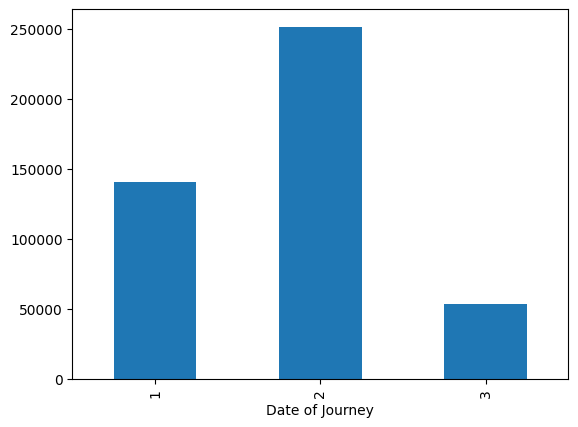

In [43]:
df['Date of Journey'].groupby(by=df['Date of Journey'].dt.month).count().plot(kind='bar')
plt.show()

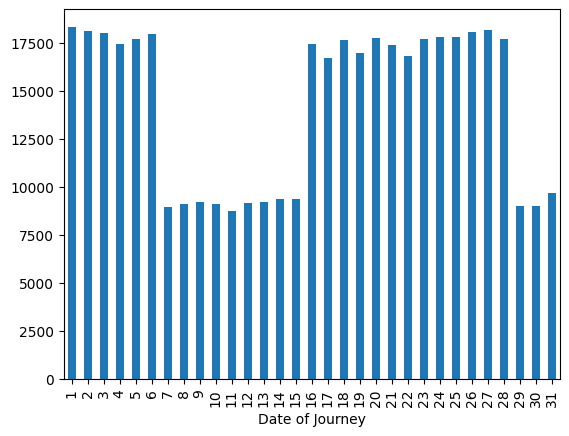

In [44]:
df['Date of Journey'].groupby(by=df['Date of Journey'].dt.day).count().plot(kind='bar')
plt.show()

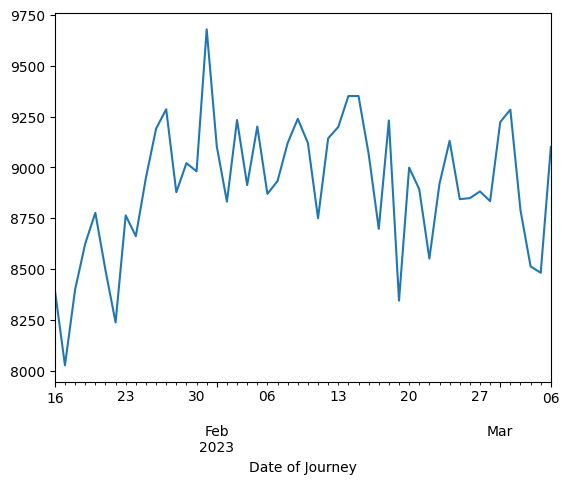

In [45]:
df['Date of Journey'].groupby(by=df['Date of Journey']).count().plot()
plt.show()

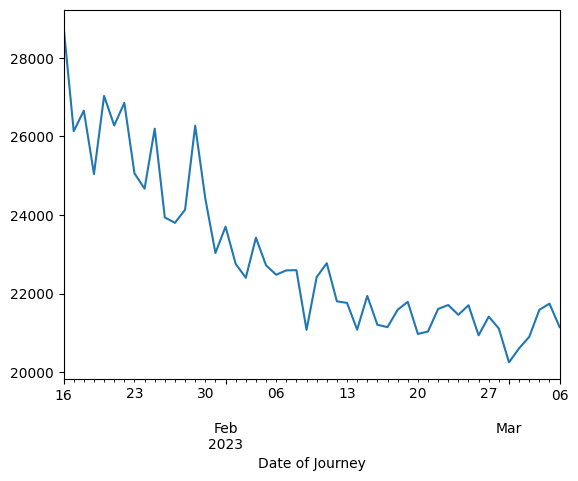

In [46]:
df.groupby('Date of Journey')['Price'].mean().plot()
plt.show()

In [47]:
df.drop(columns=['Date of Booking','Date of Journey'],inplace=True)

####Departure Time

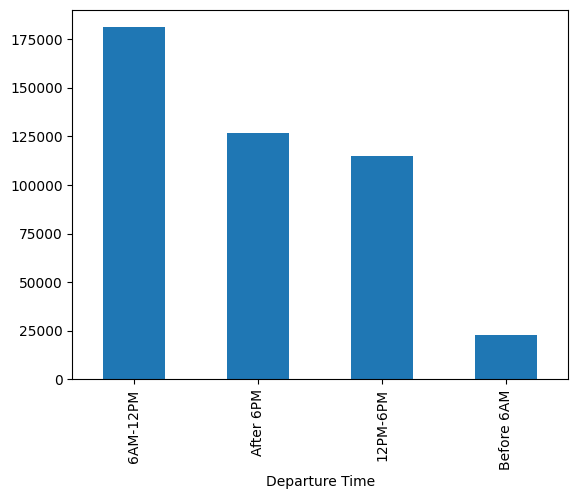

In [48]:
df['Departure Time'].value_counts().plot(kind='bar')
plt.show()

In [49]:
df.rename(columns={'Departure Time':'Departure_Time'},inplace=True)

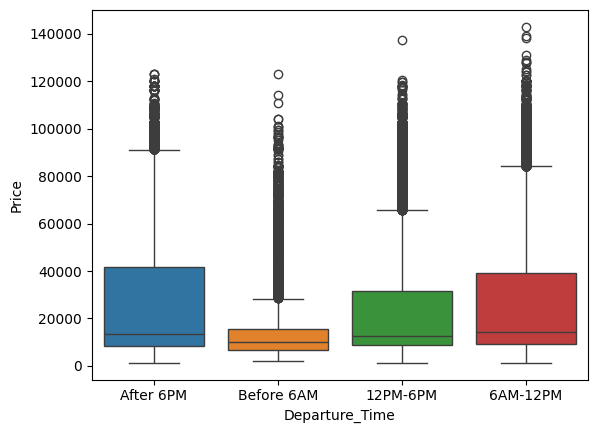

In [50]:
sns.boxplot(x=df['Departure_Time'],y=df['Price'],hue=df['Departure_Time'])
plt.show()

In [51]:
model = ols('Price ~ C(Departure_Time)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Departure_Time),3.0,1.409704e+12,4.699015e+11,1138.433441,0.0
Residual,445362.0,1.838283e+14,4.127615e+08,NaN,NaN


In [52]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['Departure_Time'].unique():
  group_data=df[df['Departure_Time']==status]['Price']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for After 6PM: p-value = 7.000961816728233e-136
Normality Test for Before 6AM: p-value = 1.7127758707432184e-105
Normality Test for 12PM-6PM: p-value = 5.476186773764567e-138
Normality Test for 6AM-12PM: p-value = 8.045265830822111e-144


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 126749.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22855.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 114743.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 181019.
  res = hypotest_fun_out(*samples, **kwds)


In [53]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['Departure_Time'] == status]['Price'] for status in df['Departure_Time'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.0


####Arrival Time

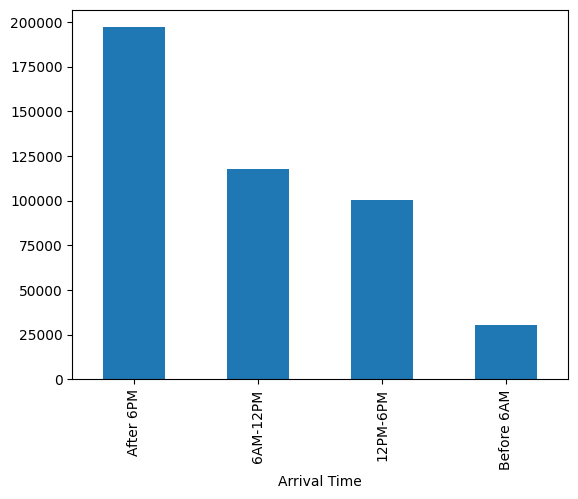

In [54]:
df['Arrival Time'].value_counts().plot(kind='bar')
plt.show()

In [55]:
df.rename(columns={'Arrival Time':'Arrival_Time'},inplace=True)

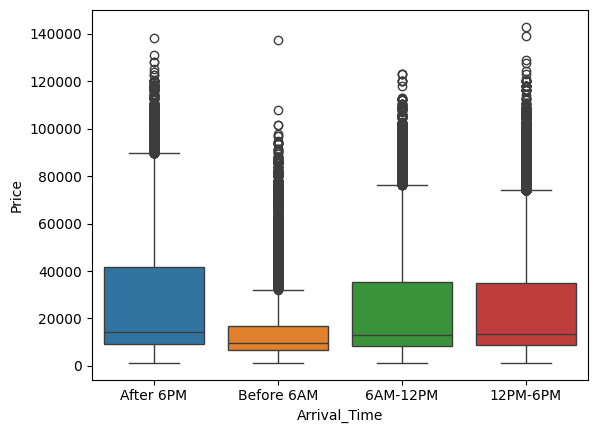

In [56]:
sns.boxplot(x=df['Arrival_Time'],y=df['Price'],hue=df['Arrival_Time'])
plt.show()

In [57]:
model = ols('Price ~ C(Arrival_Time)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Arrival_Time),3.0,1.561745e+12,5.205818e+11,1262.261058,0.0
Residual,445362.0,1.836762e+14,4.124201e+08,NaN,NaN


In [58]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['Arrival_Time'].unique():
  group_data=df[df['Arrival_Time']==status]['Price']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for After 6PM: p-value = 3.4210244648379132e-146
Normality Test for Before 6AM: p-value = 6.570470504662816e-112
Normality Test for 6AM-12PM: p-value = 1.9357946002123933e-135
Normality Test for 12PM-6PM: p-value = 1.342199948814782e-132


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 196972.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30407.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 117665.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100322.
  res = hypotest_fun_out(*samples, **kwds)


In [59]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['Arrival_Time'] == status]['Price'] for status in df['Arrival_Time'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.0


####Duration

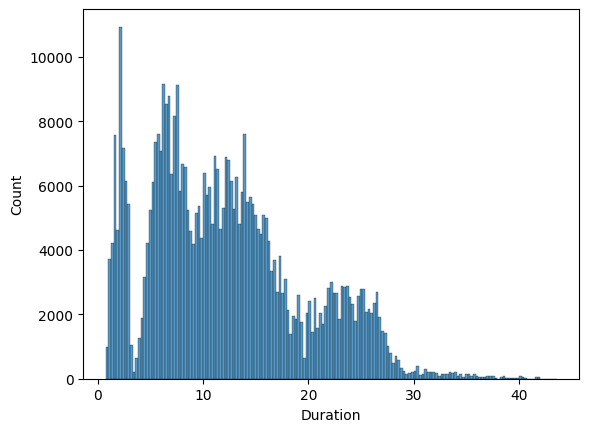

In [60]:
sns.histplot(df['Duration'])
plt.show()

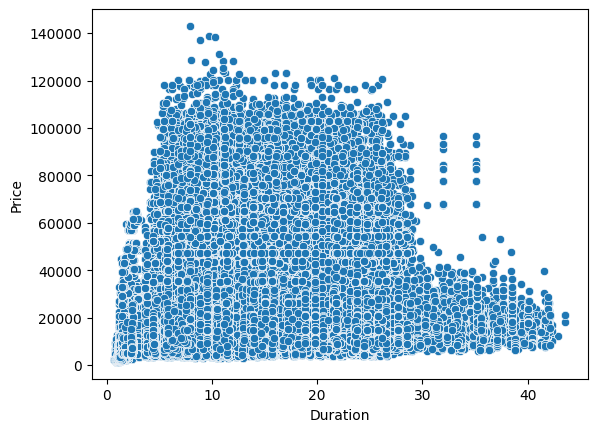

In [61]:
sns.scatterplot(x=df['Duration'],y=df['Price'])
plt.show()

In [62]:
lr=LinearRegression()
lr.fit(df['Duration'].values.reshape(-1,1),df['Price'])
lr.coef_, lr.intercept_

(array([540.00677078]), 16341.131042870828)

####Total Stops

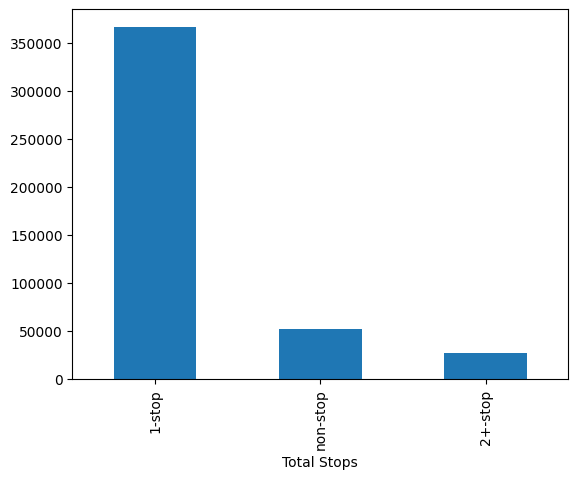

In [63]:
df['Total Stops'].value_counts().plot(kind='bar')
plt.show()

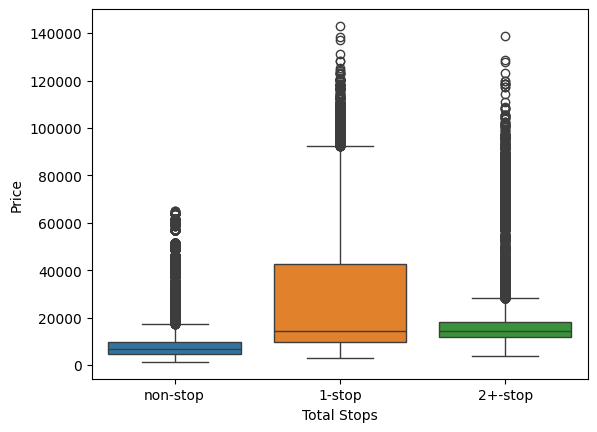

In [64]:
sns.boxplot(x=df['Total Stops'],y=df['Price'],hue=df['Total Stops'])
plt.show()

In [65]:
df.rename(columns={'Total Stops':'Stops'},inplace=True)

In [66]:
model = ols('Price ~ C(Stops)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Stops),2.0,1.048253e+13,5.241264e+12,13357.323636,0.0
Residual,445363.0,1.747554e+14,3.923888e+08,NaN,NaN


In [67]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['Stops'].unique():
  group_data=df[df['Stops']==status]['Price']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for non-stop: p-value = 1.566256287180642e-125
Normality Test for 1-stop: p-value = 1.4346578063777901e-158
Normality Test for 2+-stop: p-value = 1.6452961608241424e-118


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51755.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 366527.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27084.
  res = hypotest_fun_out(*samples, **kwds)


In [68]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['Stops'] == status]['Price'] for status in df['Stops'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.0


####Price

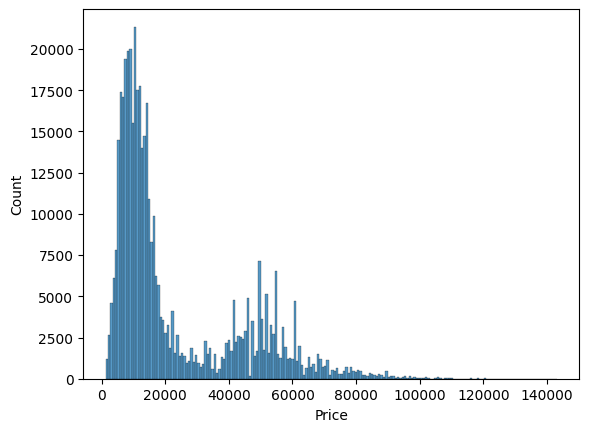

In [69]:
sns.histplot(df['Price'])
plt.show()

####Day of the Week

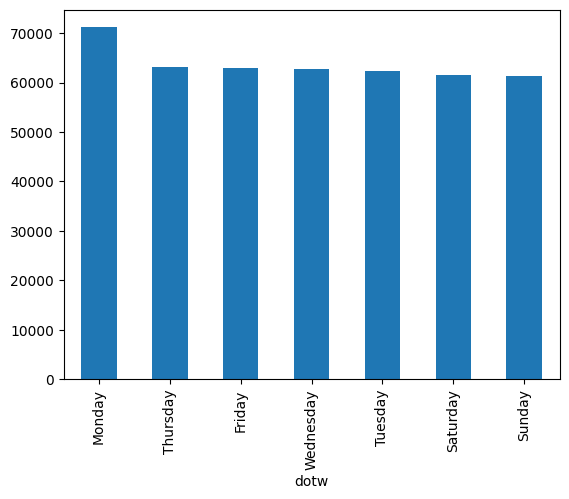

In [70]:
df['dotw'].value_counts().plot(kind='bar')
plt.show()

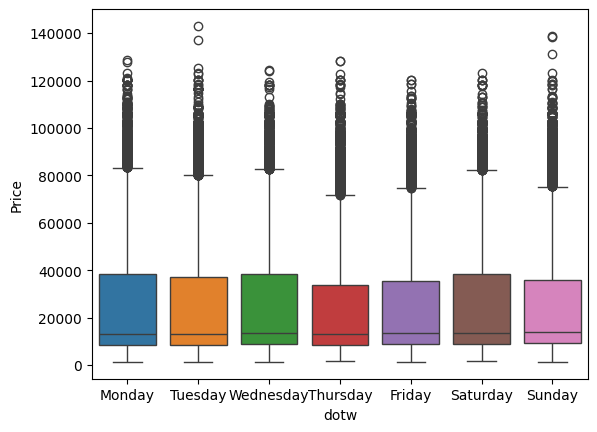

In [71]:
sns.boxplot(x=df['dotw'],y=df['Price'],hue=df['dotw'])
plt.show()

In [72]:
model = ols('Price ~ C(dotw)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(dotw),6.0,4.372282e+10,7.287137e+09,17.52426,2.125384e-20
Residual,445359.0,1.851943e+14,4.158314e+08,NaN,NaN


In [73]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['dotw'].unique():
  group_data=df[df['dotw']==status]['Price']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71194.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 62379.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 62698.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 63157.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.

Normality Test for Monday: p-value = 1.2978183830288927e-123
Normality Test for Tuesday: p-value = 3.885513633646934e-121
Normality Test for Wednesday: p-value = 1.588603000944724e-120
Normality Test for Thursday: p-value = 2.9283294284029007e-122
Normality Test for Friday: p-value = 3.9418935823452034e-121
Normality Test for Saturday: p-value = 5.069227913043902e-119
Normality Test for Sunday: p-value = 2.3774374711656542e-119


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 61624.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 61279.
  res = hypotest_fun_out(*samples, **kwds)


In [74]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['dotw'] == status]['Price'] for status in df['dotw'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 7.922140852429863e-63


####Airline

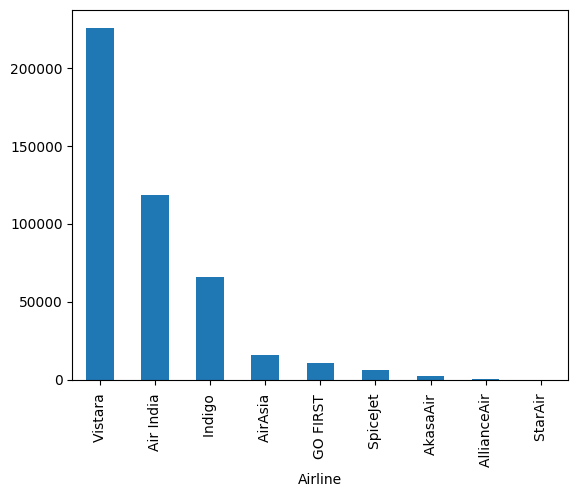

In [75]:
df['Airline'].value_counts().plot(kind='bar')
plt.show()

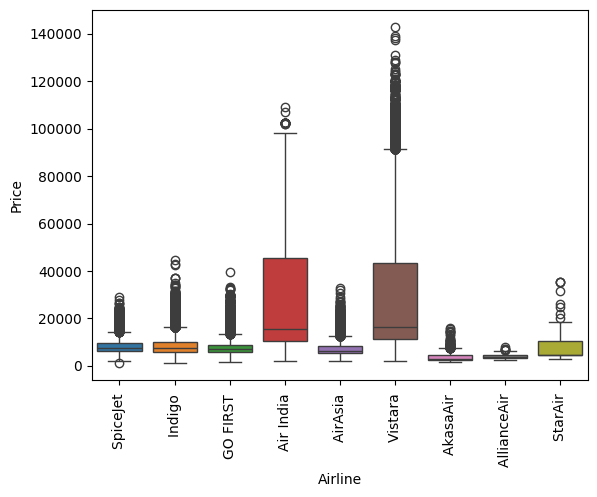

In [76]:
sns.boxplot(x=df['Airline'],y=df['Price'],hue=df['Airline'])
plt.xticks(rotation=90)
plt.show()

In [77]:
model = ols('Price ~ C(Airline)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Airline),8.0,2.951554e+13,3.689443e+12,10551.589872,0.0
Residual,445357.0,1.557224e+14,3.496575e+08,NaN,NaN


In [78]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['Airline'].unique():
  group_data=df[df['Airline']==status]['Price']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5863.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 65659.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10786.
  res = hypotest_fun_out(*samples, **kwds)


Normality Test for SpiceJet : p-value = 5.516779261176738e-56
Normality Test for Indigo : p-value = 2.2226053735022726e-97
Normality Test for GO FIRST : p-value = 2.4936459611516636e-73


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 118405.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15764.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 226204.
  res = hypotest_fun_out(*samples, **kwds)


Normality Test for Air India : p-value = 2.0688590665889324e-126
Normality Test for AirAsia : p-value = 3.1295325393676233e-75
Normality Test for Vistara : p-value = 3.6593298631435193e-146
Normality Test for AkasaAir : p-value = 3.280822392409896e-46
Normality Test for AllianceAir : p-value = 1.485840740190721e-17
Normality Test for StarAir : p-value = 1.0283575091681316e-09


In [79]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['Airline'] == status]['Price'] for status in df['Airline'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445366 entries, 0 to 452086
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Departure_Time  445366 non-null  object 
 1   Arrival_Time    445366 non-null  object 
 2   Duration        445366 non-null  float64
 3   Stops           445366 non-null  object 
 4   Price           445366 non-null  float64
 5   dotw            445366 non-null  object 
 6   Airline         445366 non-null  object 
 7   Class           445366 non-null  object 
 8   Source          445366 non-null  object 
 9   Destination     445366 non-null  object 
 10  Days            445366 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 40.8+ MB


####Class

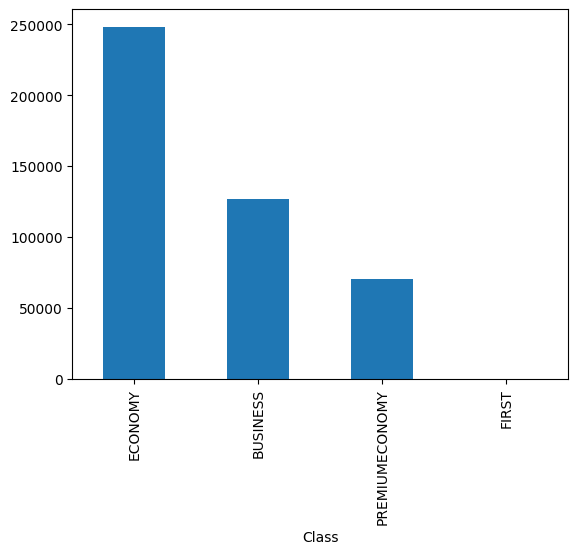

In [81]:
df['Class'].value_counts().plot(kind='bar')
plt.show()

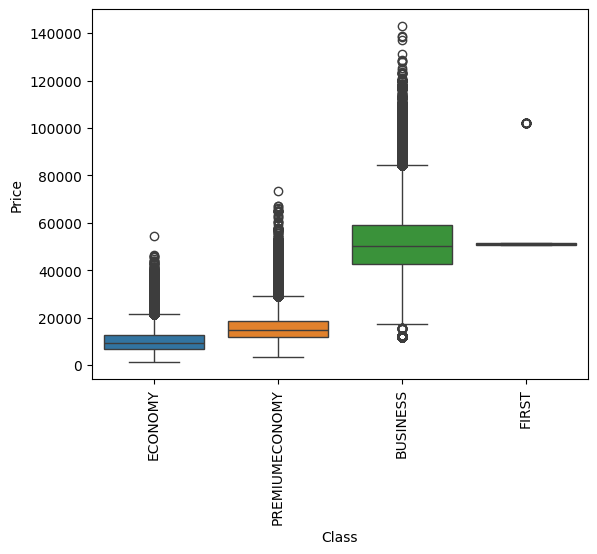

In [82]:
sns.boxplot(x=df['Class'],y=df['Price'],hue=df['Class'])
plt.xticks(rotation=90)
plt.show()

In [83]:
model = ols('Price ~ C(Class)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Class),3.0,1.480803e+14,4.936009e+13,591616.374219,0.0
Residual,445362.0,3.715771e+13,8.343260e+07,NaN,NaN


In [84]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['Class'].unique():
  group_data=df[df['Class']==status]['Price']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for ECONOMY: p-value = 2.5993486044146862e-117
Normality Test for PREMIUMECONOMY: p-value = 6.179530929654593e-105
Normality Test for BUSINESS: p-value = 5.283029127840439e-83
Normality Test for FIRST: p-value = 2.1187195941061363e-20


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 248323.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 70364.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 126535.
  res = hypotest_fun_out(*samples, **kwds)


In [85]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['Class'] == status]['Price'] for status in df['Class'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445366 entries, 0 to 452086
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Departure_Time  445366 non-null  object 
 1   Arrival_Time    445366 non-null  object 
 2   Duration        445366 non-null  float64
 3   Stops           445366 non-null  object 
 4   Price           445366 non-null  float64
 5   dotw            445366 non-null  object 
 6   Airline         445366 non-null  object 
 7   Class           445366 non-null  object 
 8   Source          445366 non-null  object 
 9   Destination     445366 non-null  object 
 10  Days            445366 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 40.8+ MB


####Source

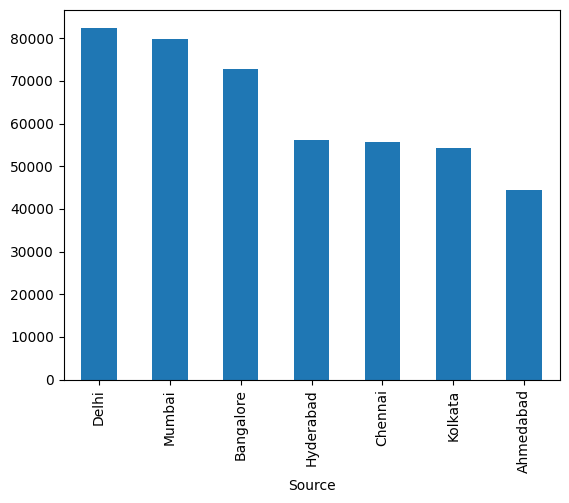

In [87]:
df['Source'].value_counts().plot(kind='bar')
plt.show()

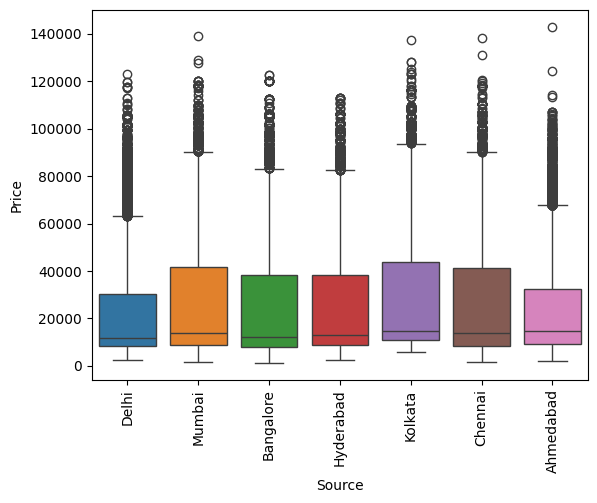

In [88]:
sns.boxplot(x=df['Source'],y=df['Price'],hue=df['Source'])
plt.xticks(rotation=90)
plt.show()

In [89]:
model = ols('Price ~ C(Source)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Source),6.0,1.038929e+12,1.731548e+11,418.656093,0.0
Residual,445359.0,1.841990e+14,4.135968e+08,NaN,NaN


In [90]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['Source'].unique():
  group_data=df[df['Source']==status]['Price']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 82481.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 79894.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 72668.
  res = hypotest_fun_out(*samples, **kwds)


Normality Test for Delhi: p-value = 8.798070863256984e-131
Normality Test for Mumbai: p-value = 6.518694582600292e-125
Normality Test for Bangalore: p-value = 1.57369010034796e-125


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 56054.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 54193.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 55659.
  res = hypotest_fun_out(*samples, **kwds)


Normality Test for Hyderabad: p-value = 3.72711617180766e-119
Normality Test for Kolkata: p-value = 9.013908541857523e-121
Normality Test for Chennai: p-value = 1.0199536985912088e-115
Normality Test for Ahmedabad: p-value = 2.4818093889077244e-107


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44417.
  res = hypotest_fun_out(*samples, **kwds)


In [91]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['Source'] == status]['Price'] for status in df['Source'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.0


####Destination

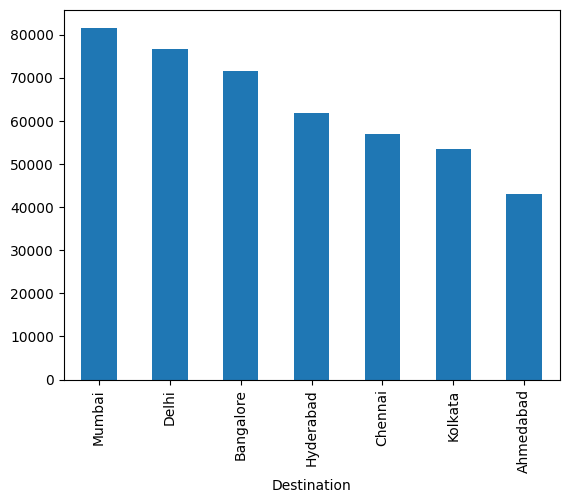

In [92]:
df['Destination'].value_counts().plot(kind='bar')
plt.show()

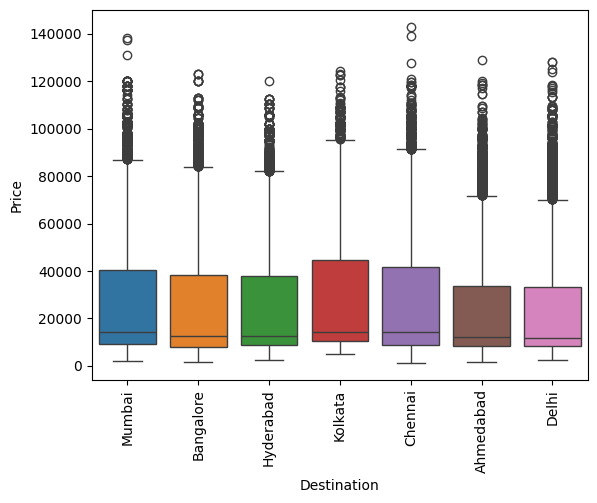

In [93]:
sns.boxplot(x=df['Destination'],y=df['Price'],hue=df['Destination'])
plt.xticks(rotation=90)
plt.show()

In [94]:
model = ols('Price ~ C(Destination)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Destination),6.0,8.500173e+11,1.416695e+11,342.179644,0.0
Residual,445359.0,1.843880e+14,4.140210e+08,NaN,NaN


In [95]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['Destination'].unique():
  group_data=df[df['Destination']==status]['Price']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 81675.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71603.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 61775.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 53465.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.

Normality Test for Mumbai: p-value = 4.763215931202225e-125
Normality Test for Bangalore: p-value = 7.199147259078824e-125
Normality Test for Hyderabad: p-value = 1.39040104088537e-121
Normality Test for Kolkata: p-value = 1.7254079872889165e-120
Normality Test for Chennai: p-value = 1.0299074996379258e-114
Normality Test for Ahmedabad: p-value = 7.170489251034317e-111
Normality Test for Delhi: p-value = 1.8871312897093943e-128


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 76758.
  res = hypotest_fun_out(*samples, **kwds)


In [96]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['Destination'] == status]['Price'] for status in df['Destination'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.0


####Days

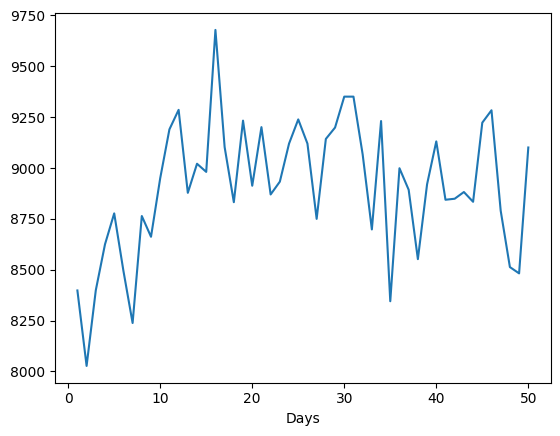

In [97]:
df.Days.value_counts().sort_index().plot(kind='line')
plt.show()

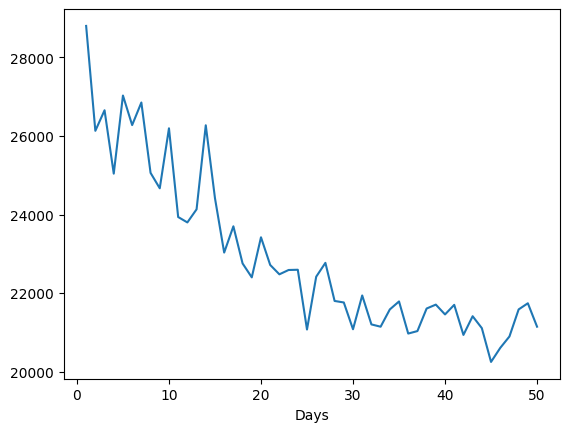

In [98]:
df.groupby('Days')['Price'].mean().plot()
plt.show()

In [99]:
model = ols('Price ~ C(Days)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Days),49.0,1.827098e+12,3.728772e+10,90.533433,0.0
Residual,445316.0,1.834109e+14,4.118668e+08,NaN,NaN


In [100]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['Days'].unique():
  group_data=df[df['Days']==status]['Price']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8398.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8027.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8399.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8625.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stat

Normality Test for 1: p-value = 2.4339928790291402e-68
Normality Test for 2: p-value = 1.6272801363359555e-68
Normality Test for 3: p-value = 8.734083780172736e-72
Normality Test for 4: p-value = 5.011252663981994e-75
Normality Test for 5: p-value = 3.6183896375331516e-70
Normality Test for 6: p-value = 3.1582908426562846e-68
Normality Test for 7: p-value = 4.951013769130533e-70
Normality Test for 8: p-value = 1.8441922152932142e-73
Normality Test for 9: p-value = 5.042941038994139e-75
Normality Test for 10: p-value = 9.462125459110487e-73
Normality Test for 11: p-value = 5.5732820967625406e-74
Normality Test for 12: p-value = 1.5326051725635416e-75
Normality Test for 13: p-value = 4.9060562233202356e-74
Normality Test for 14: p-value = 2.2835566329523155e-71
Normality Test for 15: p-value = 1.5371084776497615e-74
Normality Test for 16: p-value = 6.46534295653157e-77
Normality Test for 17: p-value = 4.127342326009838e-75
Normality Test for 18: p-value = 8.946724650858752e-76
Normality 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9231.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8345.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8999.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8893.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stat

In [101]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['Days'] == status]['Price'] for status in df['Days'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445366 entries, 0 to 452086
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Departure_Time  445366 non-null  object 
 1   Arrival_Time    445366 non-null  object 
 2   Duration        445366 non-null  float64
 3   Stops           445366 non-null  object 
 4   Price           445366 non-null  float64
 5   dotw            445366 non-null  object 
 6   Airline         445366 non-null  object 
 7   Class           445366 non-null  object 
 8   Source          445366 non-null  object 
 9   Destination     445366 non-null  object 
 10  Days            445366 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 40.8+ MB


#Preprocessing

In [103]:
X=df.drop(columns=['Price'])
y=df['Price']

In [104]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2)
xtrain.shape,xtest.shape

((356292, 10), (89074, 10))

In [105]:
xtrain.head()

,Departure_Time,Arrival_Time,Duration,Stops,dotw,Airline,Class,Source,Destination,Days
349707,6AM-12PM,12PM-6PM,2.58,non-stop,Monday,Vistara,BUSINESS,Chennai,Delhi,1
201444,6AM-12PM,After 6PM,8.33,1-stop,Tuesday,Vistara,PREMIUMECONOMY,Bangalore,Hyderabad,16
381139,6AM-12PM,After 6PM,12.25,1-stop,Wednesday,Air India,BUSINESS,Chennai,Bangalore,38
150786,6AM-12PM,12PM-6PM,9.33,2+-stop,Thursday,Vistara,BUSINESS,Mumbai,Chennai,39
44918,Before 6AM,6AM-12PM,5.83,1-stop,Wednesday,Indigo,ECONOMY,Delhi,Hyderabad,31


In [106]:
transformer=ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first',sparse_output=False),['Departure_Time','Arrival_Time','Airline','Source','Destination','dotw']),
    ('oe1',OrdinalEncoder(categories=[['non-stop','1-stop','2+-stop']]),['Stops']),
    ('oe3',OrdinalEncoder(categories=[['ECONOMY','PREMIUMECONOMY','BUSINESS','FIRST']]),['Class']),
    ('ss',StandardScaler(),['Duration','Days'])
],remainder='passthrough')

In [107]:
xtrain_trnf=pd.DataFrame(transformer.fit_transform(xtrain))
xtest_trnf=pd.DataFrame(transformer.transform(xtest))

In [108]:
transformer.get_feature_names_out()

array(['ohe__Departure_Time_6AM-12PM', 'ohe__Departure_Time_After 6PM',
       'ohe__Departure_Time_Before 6AM', 'ohe__Arrival_Time_6AM-12PM',
       'ohe__Arrival_Time_After 6PM', 'ohe__Arrival_Time_Before 6AM',
       'ohe__Airline_AirAsia ', 'ohe__Airline_AkasaAir ',
       'ohe__Airline_AllianceAir ', 'ohe__Airline_GO FIRST ',
       'ohe__Airline_Indigo ', 'ohe__Airline_SpiceJet ',
       'ohe__Airline_StarAir ', 'ohe__Airline_Vistara ',
       'ohe__Source_Bangalore', 'ohe__Source_Chennai',
       'ohe__Source_Delhi', 'ohe__Source_Hyderabad',
       'ohe__Source_Kolkata', 'ohe__Source_Mumbai',
       'ohe__Destination_Bangalore', 'ohe__Destination_Chennai',
       'ohe__Destination_Delhi', 'ohe__Destination_Hyderabad',
       'ohe__Destination_Kolkata', 'ohe__Destination_Mumbai',
       'ohe__dotw_Monday', 'ohe__dotw_Saturday', 'ohe__dotw_Sunday',
       'ohe__dotw_Thursday', 'ohe__dotw_Tuesday', 'ohe__dotw_Wednesday',
       'oe1__Stops', 'oe3__Class', 'ss__Duration', 'ss__Days'

In [109]:
col=['DepTime6A-12P', 'DepTimeAfter6PM',
       'DepTimeBefore6AM', 'ArrTime6A-12P',
       'ArrTimeAfter6P', 'ArrTimeBefore6A',
       'AirAirAsia ', 'AirAkasaAir ',
       'AirAllianceAir ', 'AirGO FIRST ',
       'AirIndigo ', 'AirSpiceJet ',
       'AirStarAir ', 'AirVistara ',
       'SoBangalore', 'SoChennai',
       'SoDelhi', 'SoHyderabad',
       'SoKolkata', 'SoMumbai',
       'DestBangalore', 'DestChennai',
       'DestDelhi', 'DestHyderabad',
       'DestKolkata', 'DestMumbai',
        'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday',
       'Stops', 'Class', 'Duration',
       'Days']
xtrain_trnf.columns=col
xtest_trnf.columns=col

In [110]:
xtrain_trnf.head()

,DepTime6A-12P,DepTimeAfter6PM,DepTimeBefore6AM,ArrTime6A-12P,ArrTimeAfter6P,ArrTimeBefore6A,AirAirAsia,AirAkasaAir,AirAllianceAir,AirGO FIRST,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Stops,Class,Duration,Days
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.314728,-1.719683
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.527059,-0.671061
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.009925,0.866917
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,-0.390073,0.936825
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.869524,0.377561


<Axes: xlabel='Price', ylabel='Count'>

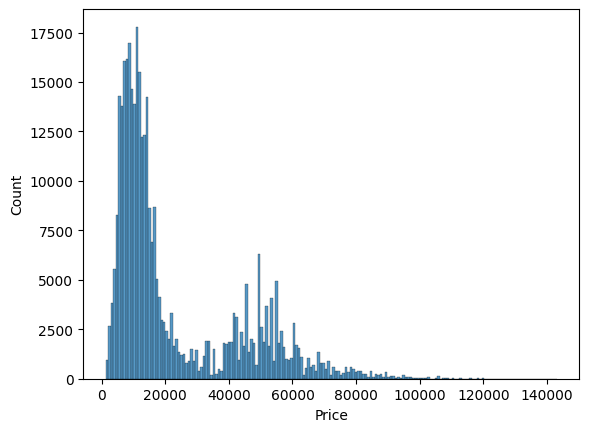

In [111]:
sns.histplot(ytrain)

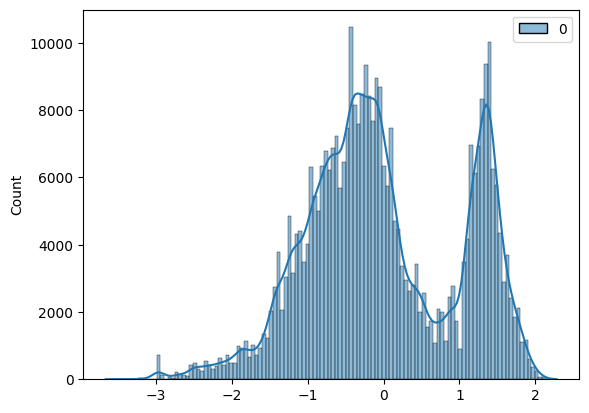

In [112]:
sns.histplot(PowerTransformer().fit_transform(ytrain.values.reshape(-1,1)),kde=True)
plt.show()

In [113]:
pt=PowerTransformer()
ytrain_trnf=pd.DataFrame(pt.fit_transform(ytrain.values.reshape(-1,1)))
ytest_trnf=pd.DataFrame(pt.transform(ytest.values.reshape(-1,1)))

#Model Fitting

## Linear Regression

In [114]:
x=sm.add_constant(xtrain_trnf)
model=sm.OLS(ytrain_trnf,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                 4.751e+04
Date:                Sat, 04 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:46:01   Log-Likelihood:            -1.9237e+05
No. Observations:              356292   AIC:                         3.848e+05
Df Residuals:                  356255   BIC:                         3.852e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0628      0.005   -215.750      0.000      -1.072      -1.053
DepTime6A-12P       -0.0161      0.002     -8.956      0.000      -0.020      -0.013
DepTimeAfter6PM     -0.0312      0.002    -15.821      0.000      -0.035      -0.027
DepTimeBefore6AM    -0.0604      0.003    -17.472      0.000      -0.067      -0.054
ArrTime6A-12P       -0.1154      0.002    -55.861      0.000      -0.119      -0.111
ArrTimeAfter6P      -0.0109      0.002     -5.915      0.000      -0.014      -0.007
ArrTimeBefore6A     -0.0983      0.003    -31.435      0.000      -0.104      -0.092
AirAirAsia          -0.6390      0.004   -155.772      0.000      -0.647      -0.631
AirAkasaAir         -1.0679      0.010   -105.149      0.000      -1.088      -1.048
AirAllianceAir      -0.8502      0.023    -36.748      0.000      -0.896      -0.805
AirGO FIRST         -0.3610      0.005    -74.696      0.000      -0.370      -0.352
AirIndigo           -0.3288      0.003   -123.490      0.000      -0.334      -0.324
AirSpiceJet         -0.2933      0.006    -46.657      0.000      -0.306      -0.281
AirStarAir          -0.0695      0.060     -1.159      0.246      -0.187       0.048
AirVistara          -0.0679      0.002    -40.249      0.000      -0.071      -0.065
SoBangalore         -0.0955      0.003    -33.206      0.000      -0.101      -0.090
SoChennai           -0.0527      0.003    -17.310      0.000      -0.059      -0.047
SoDelhi             -0.0516      0.003    -18.352      0.000      -0.057      -0.046
SoHyderabad         -0.0528      0.003    -17.500      0.000      -0.059      -0.047
SoKolkata            0.2567      0.003     84.656      0.000       0.251       0.263
SoMumbai            -0.0711      0.003    -25.140      0.000      -0.077      -0.066
DestBangalore        0.0884      0.003     30.611      0.000       0.083       0.094
DestChennai          0.1635      0.003     54.312      0.000       0.158       0.169
DestDelhi            0.1566      0.003     54.286      0.000       0.151       0.162
DestHyderabad        0.1029      0.003     34.788      0.000       0.097       0.109
DestKolkata          0.3911      0.003    128.573      0.000       0.385       0.397
DestMumbai           0.1295      0.003     45.825      0.000       0.124       0.135
Monday              -0.0138      0.003     -5.423      0.000      -0.019      -0.009
Saturday             0.0225      0.003      8.553      0.000       0.017       0.028
Sunday               0.0585      0.003     22.180      0.000       0.053       0.064
Thursday            -0.0307      0.003    -11.735      0.000      -0.036      -0.026
Tuesday             -0.0557      0.003    -21.202      0.000      -0.061      -0.051
Wednesday           -0.0199      0.003     -7.616      0.000      -0.025      -0.015
Stops                0.

In [115]:
ypred=model.predict(sm.add_constant(xtest_trnf))
mean_squared_error(ytest_trnf,ypred)

0.17221096843078848

In [116]:
r2_score(ytest_trnf,ypred)

0.8279306626306726

In [117]:
ytest_trnf.values

array([[-1.32452995],
       [-0.0080469 ],
       [ 0.10641657],
       ...,
       [-0.97166876],
       [ 0.61953009],
       [-1.30324026]])

In [118]:
ypred.values

array([-1.19871408, -0.44042371,  0.10197327, ..., -0.93373083,
        0.35064147, -0.90632759])

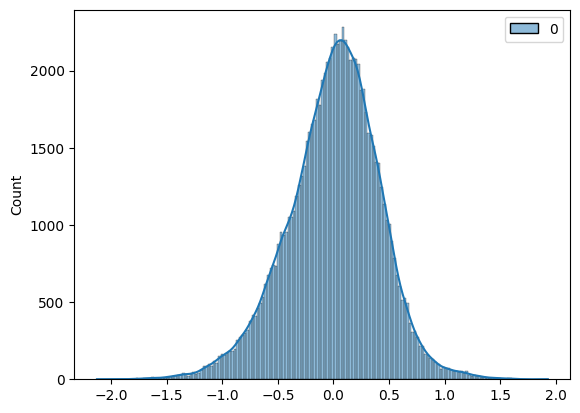

In [119]:
res=ytest_trnf.values.reshape(-1,1)-ypred.values.reshape(-1,1)
sns.histplot(res,kde=True)
plt.show()

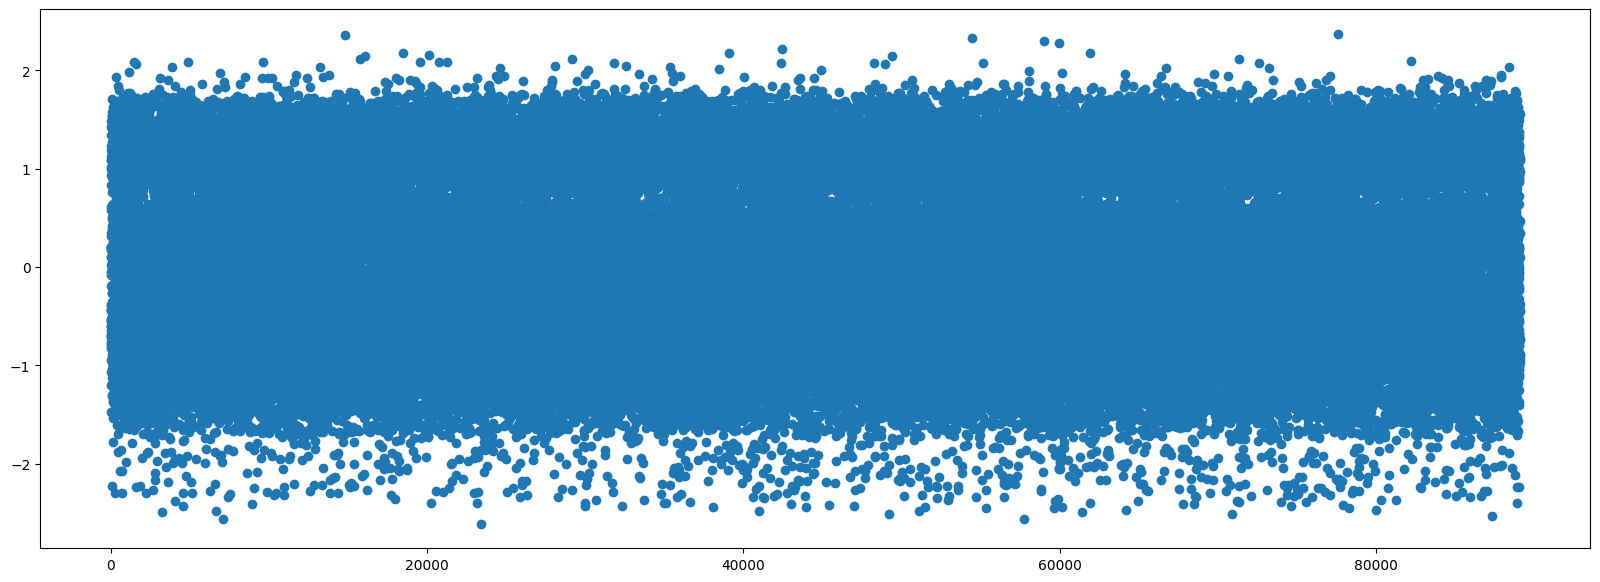

In [120]:
plt.figure(figsize=(20,7))
plt.scatter(x=range(0,len(res)),y=ypred)
plt.show()

In [121]:
vif_data=pd.DataFrame()
vif_data['Features']=xtrain_trnf.columns
vif_data['VIF']=[variance_inflation_factor(xtrain_trnf.values,i) for i in range(xtrain_trnf.shape[1])]
vif_data.sort_values(by='VIF',ascending=False)

,Features,VIF
32,Stops,7.243153
4,ArrTimeAfter6P,2.838654
13,AirVistara,2.782803
0,DepTime6A-12P,2.522138
25,DestMumbai,2.476799
19,SoMumbai,2.458623
16,SoDelhi,2.449245
14,SoBangalore,2.354075
22,DestDelhi,2.347469
20,DestBangalore,2.271146


In [122]:
lr=LinearRegression()
lr.fit(xtrain_trnf,ytrain_trnf)
ypred=lr.predict(xtest_trnf)
mean_squared_error(ytest_trnf,ypred)

0.17221096843078848

In [123]:
r2_score(ytest_trnf,ypred)

0.8279306626306726

In [124]:
r2=cross_val_score(lr,pd.DataFrame(transformer.transform(X)),
                pd.DataFrame(pt.transform(y.values.reshape(-1,1)).reshape(-1,1)),cv=5,n_jobs=-1).mean()

In [125]:
adj_r2=1-(1-r2)*(xtrain_trnf.shape[0]-1)/(xtrain_trnf.shape[0]-xtrain_trnf.shape[1]-1)
adj_r2

0.8099290997305221

##Ridge

In [126]:
ridge=Ridge()
params={'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid=GridSearchCV(ridge,param_grid=params,cv=5,n_jobs=-1)
grid.fit(pd.DataFrame(transformer.fit_transform(X)),
         pd.DataFrame(pt.fit_transform(y.values.reshape(-1,1)).reshape(-1,1)))
grid.best_params_,grid.best_score_

({'alpha': 1}, 0.8099887194232295)

In [127]:
ridge=Ridge(alpha=1)
ridge.fit(xtrain_trnf,ytrain_trnf)
ypred=ridge.predict(xtest_trnf)
mean_squared_error(ytest_trnf,ypred)

0.17221079043548498

In [128]:
cross_val_score(ridge,pd.DataFrame(transformer.transform(X)),
                pd.DataFrame(pt.transform(y.values.reshape(-1,1)).reshape(-1,1)),cv=5,n_jobs=-1,scoring='r2').mean()

0.8099887194232295

##Lasso

In [129]:
lasso=Lasso()
params={'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid=GridSearchCV(lasso,param_grid=params,cv=5,n_jobs=-1)
grid.fit(pd.DataFrame(transformer.fit_transform(X)),
         pd.DataFrame(pt.fit_transform(y.values.reshape(-1,1)).reshape(-1,1)))
grid.best_params_,grid.best_score_

({'alpha': 0.001}, 0.8056537868586758)

In [130]:
lasso=Lasso(alpha=0.001)
ridge.fit(xtrain_trnf,ytrain_trnf)
ypred=ridge.predict(xtest_trnf)
mean_squared_error(ytest_trnf,ypred)

0.17221079043548498

In [131]:
r2_score(ytest_trnf,ypred)

0.8279308404795879

In [132]:
cross_val_score(lasso,pd.DataFrame(transformer.transform(X)),
                pd.DataFrame(pt.transform(y.values.reshape(-1,1)).reshape(-1,1)),cv=5,n_jobs=-1,scoring='r2').mean()

0.8056537868586758

##Decision Tree

In [133]:
dt=DecisionTreeRegressor()
dt.fit(xtrain_trnf,ytrain_trnf)
ypred=dt.predict(xtest_trnf)
mean_squared_error(ytest_trnf,ypred)

0.06332157322337133

In [134]:
pd.DataFrame(xtrain_trnf.columns,dt.feature_importances_).sort_values(by=0,ascending=False)

,0
0.001424,Wednesday
0.001172,Tuesday
0.001195,Thursday
0.001984,Sunday
0.003651,Stops
0.003884,SoMumbai
0.006873,SoKolkata
0.003630,SoHyderabad
0.003789,SoDelhi
0.003509,SoChennai


In [135]:
"""
dt=DecisionTreeRegressor()
params={
    'max_depth':[5,8,10,12,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5],
    'max_features':[0.5,0.75,1]
}
grid=GridSearchCV(dt,param_grid=params,cv=5,n_jobs=-1,verbose=True,scoring='r2')
grid.fit(pd.DataFrame(transformer.fit_transform(X)),
         pd.DataFrame(pt.fit_transform(y.values.reshape(-1,1)).reshape(-1,1)))
grid.best_params_,grid.best_score_
"""

"\ndt=DecisionTreeRegressor()\nparams={\n    'max_depth':[5,8,10,12,15],\n    'min_samples_split':[2,5,10],\n    'min_samples_leaf':[1,2,5],\n    'max_features':[0.5,0.75,1]\n}\ngrid=GridSearchCV(dt,param_grid=params,cv=5,n_jobs=-1,verbose=True,scoring='r2')\ngrid.fit(pd.DataFrame(transformer.fit_transform(X)),\n         pd.DataFrame(pt.fit_transform(y.values.reshape(-1,1)).reshape(-1,1)))\ngrid.best_params_,grid.best_score_\n"

In [136]:
dt=DecisionTreeRegressor(max_depth=10,max_features=0.75,min_samples_split=10,random_state=2)
dt.fit(xtrain_trnf,ytrain_trnf)
ypred=dt.predict(xtest_trnf)
mean_squared_error(ytest_trnf,ypred)

0.10160753343220726

In [137]:
r2_score(ytest_trnf,ypred)

0.898476031412376

In [151]:
r2=cross_val_score(dt,pd.DataFrame(transformer.transform(X)),
                pd.DataFrame(pt.transform(y.values.reshape(-1,1)).reshape(-1,1)),cv=5,n_jobs=-1,scoring='r2').mean()

In [152]:
adj_r2=1-(1-r2)*(xtrain_trnf.shape[0]-1)/(xtrain_trnf.shape[0]-xtrain_trnf.shape[1]-1)
adj_r2

0.8459026399903881

In [140]:
pd.DataFrame(dt.feature_importances_,xtrain_trnf.columns).sort_values(by=0,ascending=False)

,0
Class,0.755110
Duration,0.126364
AirVistara,0.042120
Days,0.033112
SoKolkata,0.006756
AirAirAsia,0.006424
DestKolkata,0.005162
AirIndigo,0.003593
Stops,0.003169
AirGO FIRST,0.002487


##Random Forest

In [140]:
"""
rf=RandomForestRegressor()
params={
    'n_estimators':[100,200,300],
    'max_depth':[5,8,10,12,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5],
    'max_features':[0.5,0.75,1],
    'bootstrap':[True,False]
}
grid=HalvingGridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1,verbose=True,scoring='r2')
grid.fit(pd.DataFrame(transformer.fit_transform(X)),
         pd.DataFrame(pt.fit_transform(y.values.reshape(-1,1)).reshape(-1,1)))
grid.best_params_,grid.best_score_
"""

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 610
max_resources_: 445366
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 810
n_resources: 610
Fitting 5 folds for each of 810 candidates, totalling 4050 fits
----------
iter: 1
n_candidates: 270
n_resources: 1830
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
----------
iter: 2
n_candidates: 90
n_resources: 5490
Fitting 5 folds for each of 90 candidates, totalling 450 fits
----------
iter: 3
n_candidates: 30
n_resources: 16470
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 4
n_candidates: 10
n_resources: 49410
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 5
n_candidates: 4
n_resources: 148230
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 444690
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


({'bootstrap': True,
  'max_depth': 12,
  'max_features': 0.5,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.8643623139645463)

In [141]:
rf=RandomForestRegressor(n_estimators=200,max_depth=12,min_samples_leaf=5,min_samples_split=10,max_features=0.5,bootstrap=True,random_state=2)
rf.fit(xtrain_trnf,ytrain_trnf)
ypred=rf.predict(xtest_trnf)
mean_squared_error(ytest_trnf,ypred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.08363691859769305

In [142]:
r2_score(ytest_trnf,ypred)

0.9164318667164264

In [143]:
r2=cross_val_score(rf,pd.DataFrame(transformer.transform(X)),
                pd.DataFrame(pt.transform(y.values.reshape(-1,1)).reshape(-1,1)),cv=5,n_jobs=-1,scoring='r2').mean()

In [144]:
adj_r2=1-(1-r2)*(xtrain_trnf.shape[0]-1)/(xtrain_trnf.shape[0]-xtrain_trnf.shape[1]-1)
adj_r2

0.8640945842724659

#Stacking Regressor

In [145]:
estimators=[('lr',lr),('dt',dt),('rf',rf)]
sr=StackingRegressor(estimators=estimators,final_estimator=LinearRegression())
sr.fit(xtrain_trnf,ytrain_trnf)
ypred=sr.predict(xtest_trnf)
print(mean_squared_error(ytest_trnf,ypred), r2_score(ytest_trnf,ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:1060: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.08148520482262848 0.918581810862595


In [146]:
r2=cross_val_score(sr,pd.DataFrame(transformer.transform(X)),
                pd.DataFrame(pt.transform(y.values.reshape(-1,1)).reshape(-1,1)),cv=5,n_jobs=-1,scoring='r2').mean()

In [147]:
adj_r2=1-(1-r2)*(xtrain_trnf.shape[0]-1)/(xtrain_trnf.shape[0]-xtrain_trnf.shape[1]-1)
adj_r2

0.8652249006053996